In [1]:
# ---
# title: Eregime Analysis with ReaxKit
# description: Demonstration of how to parse and analyze eregime.in files using the ReaxKit toolkit.
# ---

# ## Step 0: Import Required Modules
# We start by importing the necessary ReaxKit modules.
# `EregimeHandler` reads and parses the `eregime.in` file,
# while `get_series` extracts data (e.g., electric field values)
# as a pandas DataFrame for analysis or plotting.

from reaxkit.io.eregime_handler import EregimeHandler
from reaxkit.analysis.eregime_analyzer import get_series


In [2]:
# ## Step 1: Parse the `eregime.in` File
# The EregimeHandler reads the input file that defines
# the electric field regimes used in ReaxFF simulations.
# 
# For example, `eregime.in` may contain:
#   - Time-dependent electric field data
#   - Iteration steps
#   - Directional components (Ex, Ey, Ez)
# 
# The handler automatically parses and organizes this data
# for further analysis.

handler = EregimeHandler("eregime.in")
print("[Done] eregime.in file successfully parsed.")


[Done] eregime.in file successfully parsed.


In [3]:
# ## Step 2: Extract Field vs. Iteration
# Using `get_series`, we can extract the field component (e.g., E1)
# versus iteration steps. This is useful when analyzing how the
# electric field changes per iteration during a simulation.

df_iter = get_series(handler, y="E1", xaxis="iter")

# Display the first few rows of the resulting DataFrame
print("📊 Electric field (E1) vs Iteration:")
display(df_iter.head())


📊 Electric field (E1) vs Iteration:


,iter,E1
0,0,0.000000
1,10000,0.029780
2,20000,0.059266
3,30000,0.088166
4,40000,0.116195


In [4]:
# ## Step 3: Extract Field vs. Time
# Alternatively, you can plot or analyze the electric field
# as a function of *time* instead of iteration.
# 
# The `control_file` parameter points to the simulation's control file,
# which provides timing information for each iteration.

df_time = get_series(handler, y="E1", xaxis="time", control_file="control")

# Display the first few rows of this DataFrame
print("📈 Electric field (E1) vs Time:")
display(df_time.head())


📈 Electric field (E1) vs Time:


,Time (ps),E1
0,0.0,0.000000
1,2.5,0.029780
2,5.0,0.059266
3,7.5,0.088166
4,10.0,0.116195


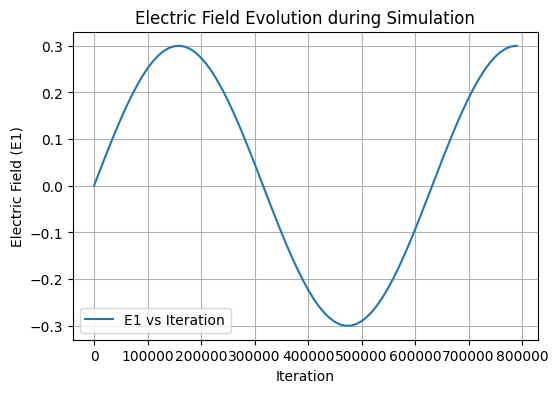

In [5]:
# ## Step 4: (Optional) Visualization
# If you want to visualize the extracted data, you can use matplotlib or plotly.
# Here’s a simple example using matplotlib:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(df_iter["iter"], df_iter["E1"], label="E1 vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Electric Field (E1)")
plt.title("Electric Field Evolution during Simulation")
plt.legend()
plt.grid(True)
plt.show()
